In [27]:
import pandas as pd
import numpy as np
import pickle
import datetime as dt
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [28]:
train = pd.read_csv("data/train.csv")
val = pd.read_csv("data/val.csv")
test = pd.read_csv("data/test.csv")

#merge everything into 1 dataframe
df = pd.concat([train, val, test], axis = 0)
df.drop("Unnamed: 0", axis = 1)


,id_review,caption,relative_date,retrieval_date,rating,username,n_review_user,n_photo_user,url_user,restraunt_name,...,other_sentiment,food_aspect_extraction_1,service_aspect_extraction_1,ambience_aspect_extraction_1,food_aspect_extraction_2,service_aspect_extraction_2,ambience_aspect_extraction_2,food_aspect_extraction_3,service_aspect_extraction_3,ambience_aspect_extraction_3
0,ChZDSUhNMG9nS0VJQ0FnSUQ4bXFuSU53EAE,Staffs are rude. Food served cold. Clearly ove...,2 years ago,48:59.1,2,Vanessa Nee,0,0,https://www.google.com/maps/contrib/1081475767...,KokSen,...,-1,food serve cold,staff rude,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ChZDSUhNMG9nS0VJQ0FnSUQybFBEUVVREAE,Overrated. Good for Instagram photos. Queue sy...,10 months ago,14:28.0,2,Gwen Goh,0,0,https://www.google.com/maps/contrib/1167846711...,Eggslut,...,0,queue system confusing i dine order,person ask i takeout queue staff say free sit ...,overrate good instagram photo,NaN,NaN,NaN,NaN,NaN,NaN
2,ChZDSUhNMG9nS0VJQ0FnSUNBNnZfdUJ3EAE,"Really good cafe. Coffee is top rate, and food...",4 years ago,34:06.1,5,Jamie Rubbi-Clarke,0,0,https://www.google.com/maps/contrib/1025726981...,PennyUniversity,...,1,coffee top rate food also really good put lot ...,staff also friendly accommodate,design overall,coffee top,overall staff staff also friendly,NaN,really good cafe coffee,NaN,NaN
3,ChZDSUhNMG9nS0VJQ0FnSURDak9tZ2NBEAE,Good atmosphere but food wise taste was okay. ...,2 years ago,10:18.9,3,Tan Ying Ying,0,0,https://www.google.com/maps/contrib/1054935453...,WheelersYard,...,1,taste okay visuall instagram worthy,NaN,good atmosphere,food wise,NaN,good atmosphere,NaN,NaN,good atmosphere
4,ChdDSUhNMG9nS0VJQ0FnSUNNeTZhTmhRRRAB,Very nice place,3 years ago,35:10.2,4,G Gopal Chopra,0,0,https://www.google.com/maps/contrib/1100920581...,Hooters,...,0,food delicious,service great,nice place,NaN,NaN,nice place,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,ChdDSUhNMG9nS0VJQ0FnSUN5OWFDY2tRRRAB,Uncomfortable seating arrangement for 3pax and...,2 years ago,09:20.2,2,Valerie NG,0,0,https://www.google.com/maps/contrib/1057667513...,WheelersYard,...,-1,NaN,uncomfortable seating arrangement 3pax group,seat huge table middle bar style hard conversa...,NaN,NaN,NaN,NaN,NaN,NaN
588,ChdDSUhNMG9nS0VJQ0FnSUMwb3Z5Q3h3RRAB,.................................................,3 years ago,12:44.3,5,Trixie Maximillia,0,0,https://www.google.com/maps/contrib/1092886785...,WheelersYard,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
589,ChdDSUhNMG9nS0VJQ0FnSUNna0szN3VnRRAB,Nice food.,4 years ago,52:07.3,4,Din Din,0,0,https://www.google.com/maps/contrib/1000114062...,Chichenti,...,0,nice food,NaN,NaN,nice food,NaN,NaN,NaN,NaN,NaN
590,ChdDSUhNMG9nS0VJQ0FnSUNLNllIWTdRRRAB,Coffee was good.,a year ago,24:48.9,5,J. S.,0,0,https://www.google.com/maps/contrib/1174774562...,PennyUniversity,...,0,coffee good,NaN,NaN,NaN,NaN,NaN,coffee wa good,NaN,NaN


# sorting the dataframe by time
- the dataset only contains relative date
    - usually a number followed by "year" , "month", "hours" e.g ("2 years ago")
    - or "a year ago" 

we want to convert them into dates

In [29]:
# text = "10 year ago"
# re.search("a [a-z]+",text).group(0)

In [30]:
retrieval_date = dt.datetime.today()
def get_review_date(text):
    # get the numbers
    if re.search("[0-9]+",text) != None:
        numbers_part = int(re.search("[0-9]+",text).group(0))
    else: 
        numbers_part = 1 # "if there is no number it means that the its 1 /year/month/day/hour/second" ago
    
    if "year" in text:
        return (retrieval_date - dt.timedelta(days = 365 * numbers_part)).date()
    elif "month" in text:
        return (retrieval_date - dt.timedelta(days = 30 * numbers_part)).date()
    elif "week" in text:
        return (retrieval_date - dt.timedelta(days = 7 * numbers_part)).date()
    elif "day" in text:
        return (retrieval_date - dt.timedelta(days = numbers_part)).date()
    elif "hour" in text:
        return (retrieval_date - dt.timedelta(hours= numbers_part)).date()
    elif "second" in text:
        return (retrieval_date - dt.timedelta(seconds= numbers_part)).date()
        
actual_date = df.relative_date.apply(lambda x : get_review_date(x))
df["date"] = pd.to_datetime(actual_date)
df

,Unnamed: 0,id_review,caption,relative_date,retrieval_date,rating,username,n_review_user,n_photo_user,url_user,...,food_aspect_extraction_1,service_aspect_extraction_1,ambience_aspect_extraction_1,food_aspect_extraction_2,service_aspect_extraction_2,ambience_aspect_extraction_2,food_aspect_extraction_3,service_aspect_extraction_3,ambience_aspect_extraction_3,date
0,0,ChZDSUhNMG9nS0VJQ0FnSUQ4bXFuSU53EAE,Staffs are rude. Food served cold. Clearly ove...,2 years ago,48:59.1,2,Vanessa Nee,0,0,https://www.google.com/maps/contrib/1081475767...,...,food serve cold,staff rude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-04
1,1,ChZDSUhNMG9nS0VJQ0FnSUQybFBEUVVREAE,Overrated. Good for Instagram photos. Queue sy...,10 months ago,14:28.0,2,Gwen Goh,0,0,https://www.google.com/maps/contrib/1167846711...,...,queue system confusing i dine order,person ask i takeout queue staff say free sit ...,overrate good instagram photo,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-08
2,2,ChZDSUhNMG9nS0VJQ0FnSUNBNnZfdUJ3EAE,"Really good cafe. Coffee is top rate, and food...",4 years ago,34:06.1,5,Jamie Rubbi-Clarke,0,0,https://www.google.com/maps/contrib/1025726981...,...,coffee top rate food also really good put lot ...,staff also friendly accommodate,design overall,coffee top,overall staff staff also friendly,NaN,really good cafe coffee,NaN,NaN,2019-04-05
3,3,ChZDSUhNMG9nS0VJQ0FnSURDak9tZ2NBEAE,Good atmosphere but food wise taste was okay. ...,2 years ago,10:18.9,3,Tan Ying Ying,0,0,https://www.google.com/maps/contrib/1054935453...,...,taste okay visuall instagram worthy,NaN,good atmosphere,food wise,NaN,good atmosphere,NaN,NaN,good atmosphere,2021-04-04
4,4,ChdDSUhNMG9nS0VJQ0FnSUNNeTZhTmhRRRAB,Very nice place,3 years ago,35:10.2,4,G Gopal Chopra,0,0,https://www.google.com/maps/contrib/1100920581...,...,food delicious,service great,nice place,NaN,NaN,nice place,NaN,NaN,NaN,2020-04-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,3887,ChdDSUhNMG9nS0VJQ0FnSUN5OWFDY2tRRRAB,Uncomfortable seating arrangement for 3pax and...,2 years ago,09:20.2,2,Valerie NG,0,0,https://www.google.com/maps/contrib/1057667513...,...,NaN,uncomfortable seating arrangement 3pax group,seat huge table middle bar style hard conversa...,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-04
588,3888,ChdDSUhNMG9nS0VJQ0FnSUMwb3Z5Q3h3RRAB,.................................................,3 years ago,12:44.3,5,Trixie Maximillia,0,0,https://www.google.com/maps/contrib/1092886785...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-04
589,3889,ChdDSUhNMG9nS0VJQ0FnSUNna0szN3VnRRAB,Nice food.,4 years ago,52:07.3,4,Din Din,0,0,https://www.google.com/maps/contrib/1000114062...,...,nice food,NaN,NaN,nice food,NaN,NaN,NaN,NaN,NaN,2019-04-05
590,3890,ChdDSUhNMG9nS0VJQ0FnSUNLNllIWTdRRRAB,Coffee was good.,a year ago,24:48.9,5,J. S.,0,0,https://www.google.com/maps/contrib/1174774562...,...,coffee good,NaN,NaN,NaN,NaN,NaN,coffee wa good,NaN,NaN,2022-04-04


In [31]:
df.loc[df.food_aspect_extraction_2.isna(), "food_aspect_extraction_2"] = ""
df.loc[df.ambience_aspect_extraction_2.isna(), "ambience_aspect_extraction_2"] = ""
df.loc[df.service_aspect_extraction_2.isna(), "service_aspect_extraction_2"] = ""

# Getting the sentiment scores using our saved models

In [32]:
# load models that we want to use

food_model = pd.read_pickle("extraction_2_models/BOW_food_RF.pkg")
svc_model = pd.read_pickle("extraction_2_models/TFIDF_service_LgstcRegression.pkg")
ambience_model = pd.read_pickle("extraction_2_models/tfidf_ambience_XGB.pkg")


food_encoder = pd.read_pickle("extraction_2_models/encoding_bow_food.pkg") 
svc_encoder = pd.read_pickle("extraction_2_models/encoding_tfidf_service.pkg")
ambience_encoder = pd.read_pickle("extraction_2_models/encoding_tfidf_ambience.pkg")

In [33]:
df = df[["restraunt_name","date","food_aspect_extraction_2","service_aspect_extraction_2","ambience_aspect_extraction_2","rating"]]

In [34]:
# getting the sentimend scores using trained models
restraunts = df.restraunt_name.unique()

res = pd.DataFrame()

for restraunt in restraunts:
    
    # get the food 
    sub_df = df[df.restraunt_name == restraunt]
    food_sub_df = sub_df[["food_aspect_extraction_2","rating"]]
    svc_sub_df = sub_df[["service_aspect_extraction_2","rating"]]
    ambience_sub_df = sub_df[["ambience_aspect_extraction_2","rating"]]

    food_feature = food_encoder.transform(food_sub_df["food_aspect_extraction_2"]).toarray()
    food_feature = np.hstack([food_feature,food_sub_df.rating.to_numpy().reshape(-1,1)])
    sub_df["food_sentiment"] = food_model.predict(food_feature)

    svc_feature = svc_encoder.transform(svc_sub_df["service_aspect_extraction_2"]).toarray()
    svc_feature = np.hstack([svc_feature,svc_sub_df.rating.to_numpy().reshape(-1,1)])
    sub_df["service_sentiment"] = svc_model.predict(svc_feature)

    ambience_feature = ambience_encoder.transform(ambience_sub_df["ambience_aspect_extraction_2"]).toarray()
    ambience_feature = np.hstack([ambience_feature,ambience_sub_df.rating.to_numpy().reshape(-1,1)])
    sub_df["ambience_sentiment"] = ambience_model.predict(ambience_feature)

    res = pd.concat([res,sub_df], axis = 0)


res

/var/folders/vg/q5w3xdtj6cq6f0pfq2dpdgkh0000gn/T/ipykernel_36195/2632001005.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["food_sentiment"] = food_model.predict(food_feature)
/var/folders/vg/q5w3xdtj6cq6f0pfq2dpdgkh0000gn/T/ipykernel_36195/2632001005.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["service_sentiment"] = svc_model.predict(svc_feature)
/var/folders/vg/q5w3xdtj6cq6f0pfq2dpdgkh0000gn/T/ipykernel_36195/2632001005.py:24: SettingWithCopyWarning: 
A value is trying to be s

,restraunt_name,date,food_aspect_extraction_2,service_aspect_extraction_2,ambience_aspect_extraction_2,rating,food_sentiment,service_sentiment,ambience_sentiment
0,KokSen,2021-04-04,,,,2,0,0,0
18,KokSen,2023-03-21,,,,5,1,0,0
35,KokSen,2022-12-05,,,,4,1,0,0
38,KokSen,2023-02-03,,service atrocious,,1,0,-1,0
47,KokSen,2020-04-04,food okay,service take too long,,3,0,0,0
...,...,...,...,...,...,...,...,...,...
538,LolaCafe,2020-04-04,,,place cozy,3,0,0,1
544,LolaCafe,2021-04-04,nice coffee,,,4,1,0,0
548,LolaCafe,2017-04-05,somewhat good pastry good pastry,,,3,1,0,0
571,LolaCafe,2022-04-04,,friendly staff,,4,1,1,0


In [35]:
res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3892 entries, 0 to 583
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   restraunt_name                3892 non-null   object        
 1   date                          3892 non-null   datetime64[ns]
 2   food_aspect_extraction_2      3892 non-null   object        
 3   service_aspect_extraction_2   3892 non-null   object        
 4   ambience_aspect_extraction_2  3892 non-null   object        
 5   rating                        3892 non-null   int64         
 6   food_sentiment                3892 non-null   int64         
 7   service_sentiment             3892 non-null   int64         
 8   ambience_sentiment            3892 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 304.1+ KB


# Aggregating the results across restraunts
Estimated sentiment score for the $k^{th}$ review on a single aspect = $S_k \in \{-1,0,1\}$

$$
Score_{i,j} = \frac{\sum_{k = 1}^n{S}_{i,j,k}}{n} \quad i = aspect \ , j = restraunt 
$$


In [36]:
# def calculate_score(x):
#     sum_positive_and_negative = sum(x)
#     count_positive_and_negative = len([i for i in x if i != 0])
#     return sum_positive_and_negative/count_positive_and_negative

# agg_food = pd.DataFrame(res.groupby("restraunt_name")["food_sentiment"].apply(lambda x : calculate_score(x)))
# agg_svc = pd.DataFrame(res.groupby("restraunt_name")["service_sentiment"].apply(lambda x : calculate_score(x)))
# agg_amb = pd.DataFrame(res.groupby("restraunt_name")["ambience_sentiment"].apply(lambda x : calculate_score(x)))
# agg_results = pd.concat([agg_food, agg_svc, agg_amb], axis = 1)
# agg_results
agg_food = pd.DataFrame(res.groupby("restraunt_name")["food_sentiment"].apply(lambda x : sum(x)/len(x)))
agg_svc = pd.DataFrame(res.groupby("restraunt_name")["service_sentiment"].apply(lambda x : sum(x)/len(x)))
agg_amb = pd.DataFrame(res.groupby("restraunt_name")["ambience_sentiment"].apply(lambda x : sum(x)/len(x)))
agg_results = pd.concat([agg_food, agg_svc, agg_amb], axis = 1)
agg_results

,food_sentiment,service_sentiment,ambience_sentiment
restraunt_name,,,
Chichenti,0.883562,0.102740,0.140411
Eggslut,0.678623,-0.008608,0.064562
Hooters,0.685864,0.054974,0.162304
KokSen,0.757895,-0.054386,0.036842
LolaCafe,0.863216,0.123845,0.316081
PennyUniversity,0.800718,0.034111,0.210054
WheelersYard,0.745098,-0.007130,0.320856


# Rank by food top 3

In [37]:
agg_results.sort_values("food_sentiment", ascending= False)[["food_sentiment"]][:3]

,food_sentiment
restraunt_name,
Chichenti,0.883562
LolaCafe,0.863216
PennyUniversity,0.800718


# Rank by serivce top 3

In [38]:
agg_results.sort_values("service_sentiment", ascending= False)[["service_sentiment"]][:3]

,service_sentiment
restraunt_name,
LolaCafe,0.123845
Chichenti,0.102740
Hooters,0.054974


# rank by ambience top 3

In [39]:
agg_results.sort_values("ambience_sentiment", ascending= False)[["ambience_sentiment"]][:3]

,ambience_sentiment
restraunt_name,
WheelersYard,0.320856
LolaCafe,0.316081
PennyUniversity,0.210054


# Overtime

In [40]:
# create ones so that we can do a rolling count
res["x"] = np.ones(res.shape[0])

res_overtime = pd.DataFrame()

for restraunt in res.restraunt_name.unique():
    sub_df = res[res.restraunt_name == restraunt][["restraunt_name","date","food_sentiment","service_sentiment","ambience_sentiment","x"]]

    sub_df["food_senti_overtime"] = sub_df.food_sentiment.cumsum()/sub_df["x"].cumsum()
    sub_df["service_senti_overtime"] = sub_df.service_sentiment.cumsum()/sub_df["x"].cumsum()
    sub_df["ambience_senti_overtime"] = sub_df.ambience_sentiment.cumsum()/sub_df["x"].cumsum()
    sub_df = sub_df.drop(["food_sentiment","service_sentiment","ambience_sentiment","x"], axis = 1)
    res_overtime = pd.concat([res_overtime,sub_df], axis = 0)

res_overtime

,restraunt_name,date,food_senti_overtime,service_senti_overtime,ambience_senti_overtime
0,KokSen,2021-04-04,0.000000,0.000000,0.000000
18,KokSen,2023-03-21,0.500000,0.000000,0.000000
35,KokSen,2022-12-05,0.666667,0.000000,0.000000
38,KokSen,2023-02-03,0.500000,-0.250000,0.000000
47,KokSen,2020-04-04,0.400000,-0.200000,0.000000
...,...,...,...,...,...
538,LolaCafe,2020-04-04,0.862197,0.122905,0.318436
544,LolaCafe,2021-04-04,0.862454,0.122677,0.317844
548,LolaCafe,2017-04-05,0.862709,0.122449,0.317254
571,LolaCafe,2022-04-04,0.862963,0.124074,0.316667


In [41]:
res_overtime = res_overtime.sort_values(["restraunt_name","date"], ascending= True)
res_overtime = res_overtime.drop_duplicates(subset=["restraunt_name","date"], keep= "last") # one date could have many updates in scores, we just keep the first one, should give roughly the same results over a long period of time
res_overtime

,restraunt_name,date,food_senti_overtime,service_senti_overtime,ambience_senti_overtime
594,Chichenti,2014-04-06,0.853659,0.109756,0.134146
961,Chichenti,2015-04-06,0.872340,0.099291,0.113475
562,Chichenti,2016-04-05,0.882960,0.099828,0.139415
301,Chichenti,2017-04-05,0.864516,0.105376,0.139785
107,Chichenti,2018-04-05,0.874517,0.102317,0.137066
...,...,...,...,...,...
419,WheelersYard,2023-02-03,0.722944,-0.017316,0.316017
545,WheelersYard,2023-03-05,0.742754,-0.007246,0.320652
2030,WheelersYard,2023-03-21,0.692053,-0.029801,0.324503
1852,WheelersYard,2023-03-28,0.705674,-0.028369,0.319149


# The scores are rescaled with standard scaler so that we can see compare the 3 sentiment on the same axis, the y -axis represents the scaled sentiment score

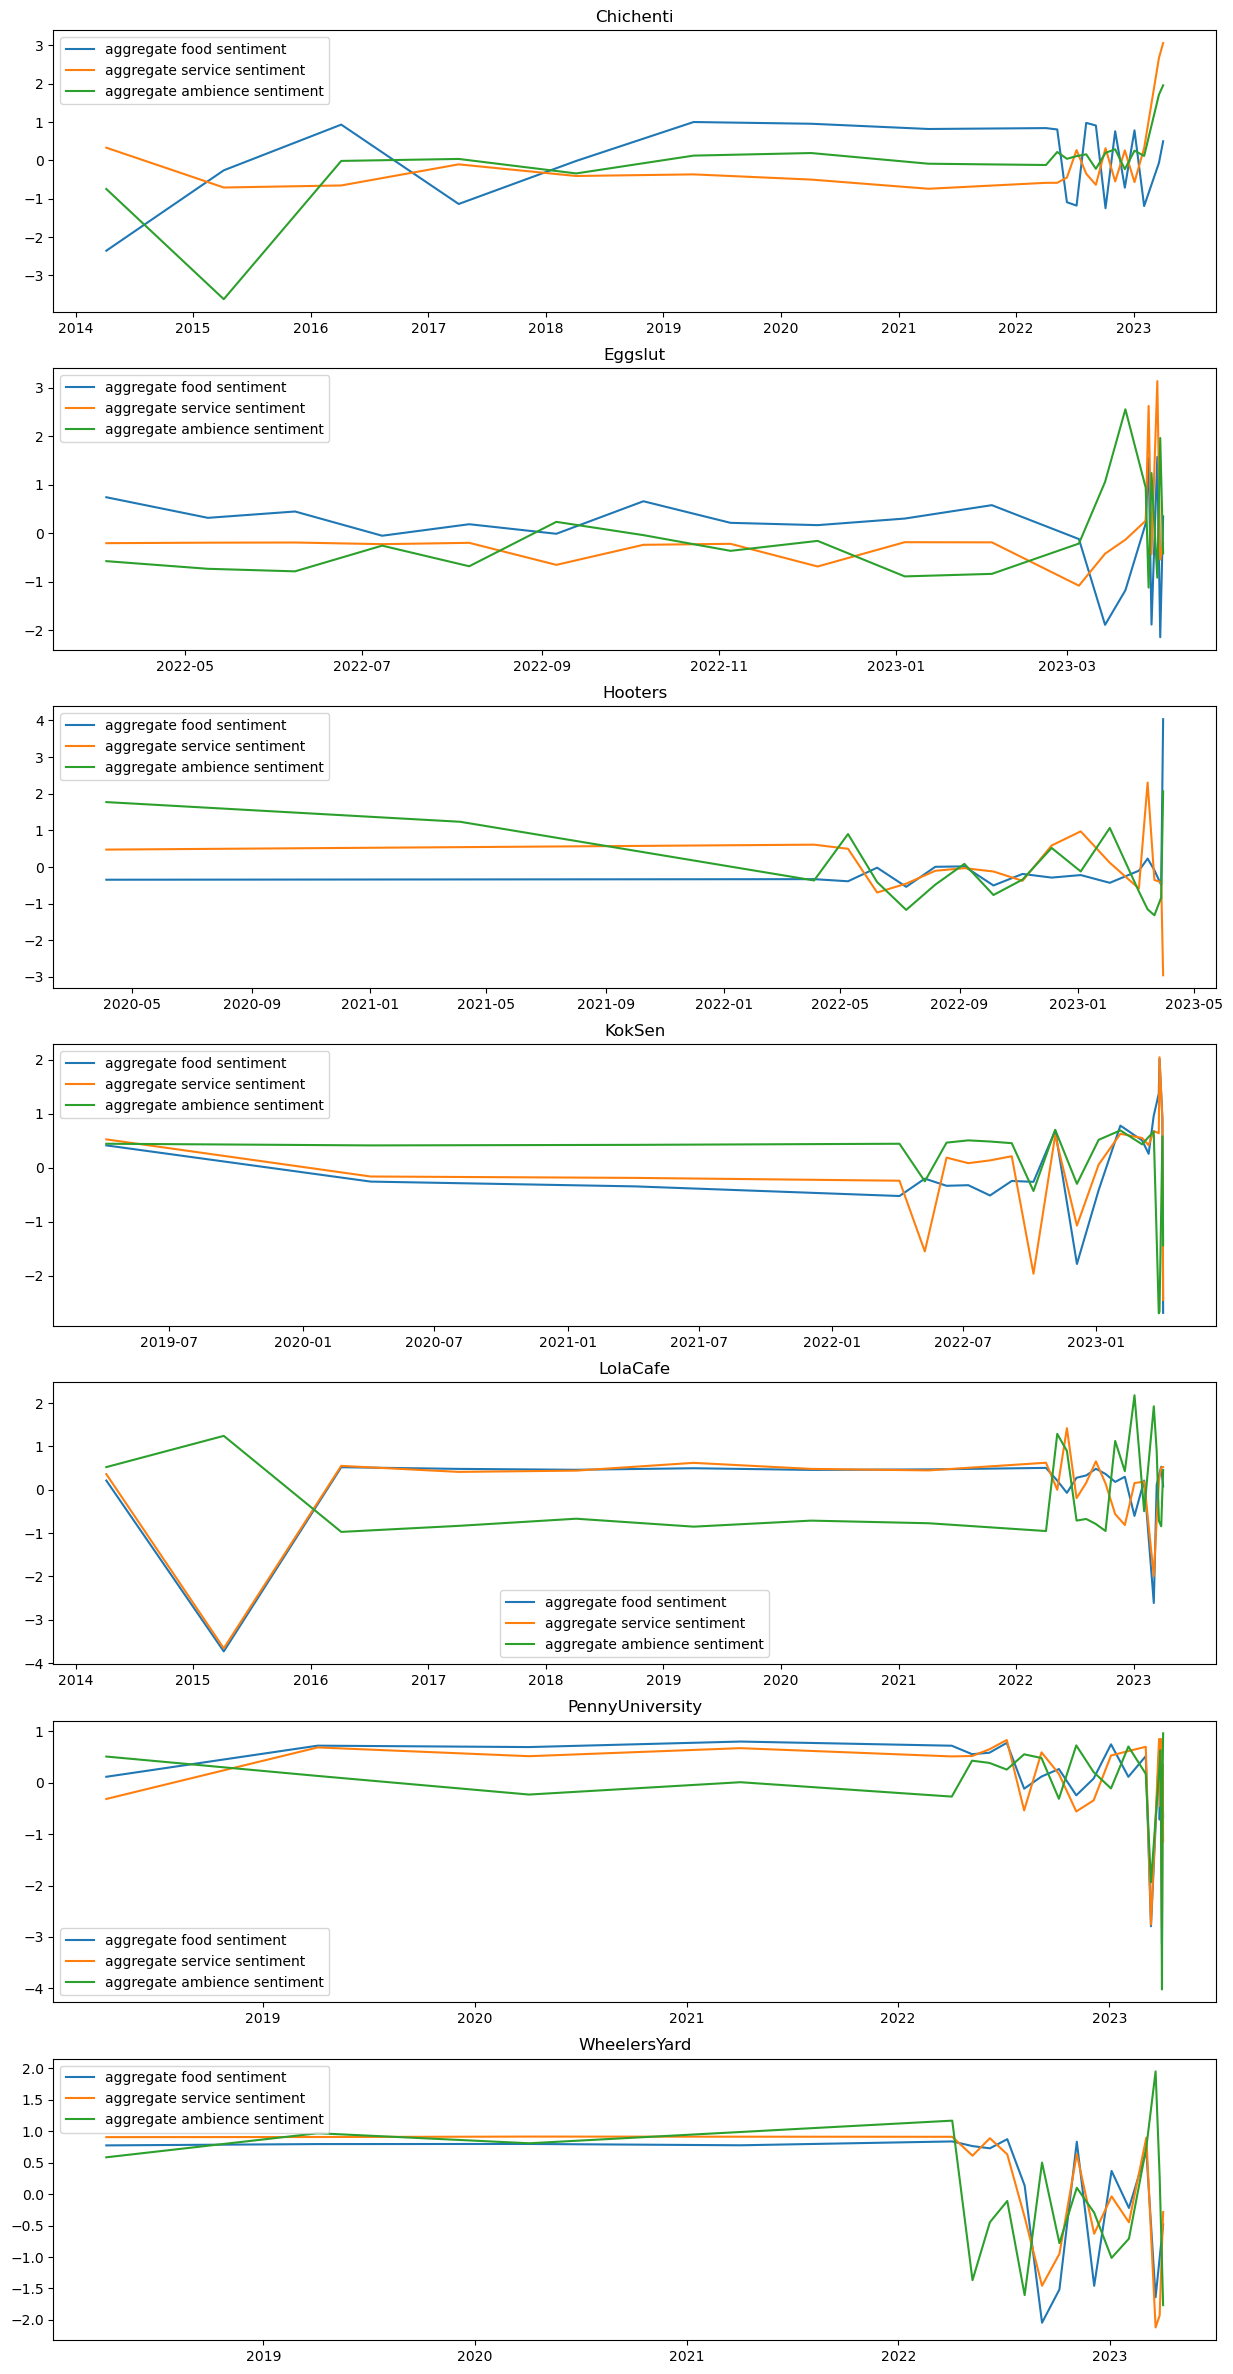

In [42]:
fig , ax = plt.subplots(7, figsize = (15,30))
count = 0
for restraunt in res_overtime.restraunt_name.unique():
    # abit difficult to see we have to scale all 3 scores 
    sub_df = res_overtime[res_overtime.restraunt_name == restraunt]

    scaler = StandardScaler()
    scaled_score = scaler.fit_transform(sub_df[["food_senti_overtime","service_senti_overtime","ambience_senti_overtime"]])

    ax[count].plot(sub_df.date, scaled_score[:,0] , label = "aggregate food sentiment")
    ax[count].plot(sub_df.date, scaled_score[:,1], label = "aggregate service sentiment")
    ax[count].plot(sub_df.date, scaled_score[:,2], label = "aggregate ambience sentiment")
    ax[count].legend()
    ax[count].set_title(restraunt)
    count += 1